## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  65.063052   961.991580  0.144713  4.267507  153.624871
1  27.901049   731.358822  0.957227  9.957559  700.630379
2  20.305664   580.751573  0.367105  6.146432  214.073357
3  87.262741  1738.637348  0.442592  9.643996  774.487733
4  92.462046  1369.700269  0.478627  6.912502  661.959671


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0172357	total: 56.8ms	remaining: 56.8s
1:	learn: 1.0040522	total: 57.3ms	remaining: 28.6s
2:	learn: 0.9933116	total: 57.7ms	remaining: 19.2s
3:	learn: 0.9814331	total: 58.1ms	remaining: 14.5s
4:	learn: 0.9673368	total: 58.5ms	remaining: 11.6s
5:	learn: 0.9545114	total: 59ms	remaining: 9.77s
6:	learn: 0.9413682	total: 59.3ms	remaining: 8.41s
7:	learn: 0.9291747	total: 59.9ms	remaining: 7.42s
8:	learn: 0.9156029	total: 60.3ms	remaining: 6.64s
9:	learn: 0.9029641	total: 60.8ms	remaining: 6.01s
10:	learn: 0.8920123	total: 61.2ms	remaining: 5.5s
11:	learn: 0.8785257	total: 61.7ms	remaining: 5.08s
12:	learn: 0.8658060	total: 62.7ms	remaining: 4.76s
13:	learn: 0.8533754	total: 63.2ms	remaining: 4.45s
14:	learn: 0.8410562	total: 63.8ms	remaining: 4.19s
15:	learn: 0.8312780	total: 64.3ms	remaining: 3.95s
16:	learn: 0.8172143	total: 64.6ms	remaining: 3.73s
17:	learn: 0.8072178	total: 65ms	remaining: 3.54s
18:	learn: 0.7979120	total: 65.4ms	remaining: 3.3

92:	learn: 0.3113038	total: 99ms	remaining: 966ms
93:	learn: 0.3076492	total: 99.6ms	remaining: 960ms
94:	learn: 0.3037224	total: 100ms	remaining: 953ms
95:	learn: 0.3003702	total: 100ms	remaining: 946ms
96:	learn: 0.2972468	total: 101ms	remaining: 940ms
97:	learn: 0.2937240	total: 101ms	remaining: 934ms
98:	learn: 0.2906199	total: 102ms	remaining: 928ms
99:	learn: 0.2865210	total: 102ms	remaining: 922ms
100:	learn: 0.2830300	total: 103ms	remaining: 916ms
101:	learn: 0.2801802	total: 103ms	remaining: 909ms
102:	learn: 0.2774868	total: 104ms	remaining: 904ms
103:	learn: 0.2741607	total: 104ms	remaining: 899ms
104:	learn: 0.2716235	total: 105ms	remaining: 894ms
105:	learn: 0.2682142	total: 105ms	remaining: 888ms
106:	learn: 0.2652963	total: 106ms	remaining: 883ms
107:	learn: 0.2621584	total: 106ms	remaining: 877ms
108:	learn: 0.2588181	total: 107ms	remaining: 872ms
109:	learn: 0.2562085	total: 107ms	remaining: 864ms
110:	learn: 0.2532589	total: 107ms	remaining: 859ms
111:	learn: 0.250699

298:	learn: 0.0590116	total: 184ms	remaining: 433ms
299:	learn: 0.0587310	total: 185ms	remaining: 432ms
300:	learn: 0.0583850	total: 185ms	remaining: 431ms
301:	learn: 0.0581549	total: 186ms	remaining: 430ms
302:	learn: 0.0578960	total: 186ms	remaining: 428ms
303:	learn: 0.0577258	total: 187ms	remaining: 427ms
304:	learn: 0.0574215	total: 187ms	remaining: 426ms
305:	learn: 0.0570310	total: 187ms	remaining: 425ms
306:	learn: 0.0567353	total: 188ms	remaining: 424ms
307:	learn: 0.0563850	total: 188ms	remaining: 423ms
308:	learn: 0.0561287	total: 189ms	remaining: 422ms
309:	learn: 0.0559892	total: 189ms	remaining: 420ms
310:	learn: 0.0557247	total: 189ms	remaining: 419ms
311:	learn: 0.0553312	total: 190ms	remaining: 418ms
312:	learn: 0.0550683	total: 190ms	remaining: 417ms
313:	learn: 0.0549313	total: 190ms	remaining: 416ms
314:	learn: 0.0548180	total: 191ms	remaining: 415ms
315:	learn: 0.0545859	total: 191ms	remaining: 414ms
316:	learn: 0.0544584	total: 192ms	remaining: 413ms
317:	learn: 

523:	learn: 0.0222620	total: 278ms	remaining: 252ms
524:	learn: 0.0221658	total: 278ms	remaining: 252ms
525:	learn: 0.0221402	total: 279ms	remaining: 251ms
526:	learn: 0.0220623	total: 279ms	remaining: 251ms
527:	learn: 0.0220372	total: 280ms	remaining: 250ms
528:	learn: 0.0220124	total: 280ms	remaining: 249ms
529:	learn: 0.0219879	total: 281ms	remaining: 249ms
530:	learn: 0.0218962	total: 281ms	remaining: 248ms
531:	learn: 0.0217963	total: 281ms	remaining: 248ms
532:	learn: 0.0217724	total: 282ms	remaining: 247ms
533:	learn: 0.0216967	total: 282ms	remaining: 246ms
534:	learn: 0.0216731	total: 283ms	remaining: 246ms
535:	learn: 0.0215761	total: 283ms	remaining: 245ms
536:	learn: 0.0214793	total: 284ms	remaining: 244ms
537:	learn: 0.0213878	total: 284ms	remaining: 244ms
538:	learn: 0.0212934	total: 284ms	remaining: 243ms
539:	learn: 0.0211801	total: 285ms	remaining: 243ms
540:	learn: 0.0211065	total: 285ms	remaining: 242ms
541:	learn: 0.0210248	total: 286ms	remaining: 241ms
542:	learn: 

714:	learn: 0.0126911	total: 363ms	remaining: 145ms
715:	learn: 0.0126395	total: 364ms	remaining: 144ms
716:	learn: 0.0125924	total: 364ms	remaining: 144ms
717:	learn: 0.0125688	total: 365ms	remaining: 143ms
718:	learn: 0.0125578	total: 365ms	remaining: 143ms
719:	learn: 0.0125065	total: 366ms	remaining: 142ms
720:	learn: 0.0124580	total: 366ms	remaining: 142ms
721:	learn: 0.0124349	total: 366ms	remaining: 141ms
722:	learn: 0.0124122	total: 367ms	remaining: 141ms
723:	learn: 0.0124005	total: 367ms	remaining: 140ms
724:	learn: 0.0123782	total: 368ms	remaining: 140ms
725:	learn: 0.0123323	total: 368ms	remaining: 139ms
726:	learn: 0.0123244	total: 369ms	remaining: 138ms
727:	learn: 0.0122793	total: 369ms	remaining: 138ms
728:	learn: 0.0122190	total: 370ms	remaining: 137ms
729:	learn: 0.0122076	total: 370ms	remaining: 137ms
730:	learn: 0.0121513	total: 371ms	remaining: 136ms
731:	learn: 0.0121016	total: 371ms	remaining: 136ms
732:	learn: 0.0120905	total: 372ms	remaining: 135ms
733:	learn: 

915:	learn: 0.0063277	total: 456ms	remaining: 41.9ms
916:	learn: 0.0063097	total: 457ms	remaining: 41.4ms
917:	learn: 0.0062963	total: 457ms	remaining: 40.9ms
918:	learn: 0.0062717	total: 458ms	remaining: 40.4ms
919:	learn: 0.0062464	total: 458ms	remaining: 39.9ms
920:	learn: 0.0062279	total: 459ms	remaining: 39.4ms
921:	learn: 0.0061989	total: 459ms	remaining: 38.9ms
922:	learn: 0.0061725	total: 460ms	remaining: 38.4ms
923:	learn: 0.0061552	total: 460ms	remaining: 37.9ms
924:	learn: 0.0061317	total: 461ms	remaining: 37.4ms
925:	learn: 0.0061084	total: 461ms	remaining: 36.8ms
926:	learn: 0.0061026	total: 462ms	remaining: 36.3ms
927:	learn: 0.0060771	total: 462ms	remaining: 35.8ms
928:	learn: 0.0060637	total: 462ms	remaining: 35.3ms
929:	learn: 0.0060386	total: 463ms	remaining: 34.8ms
930:	learn: 0.0060160	total: 463ms	remaining: 34.3ms
931:	learn: 0.0059930	total: 464ms	remaining: 33.8ms
932:	learn: 0.0059799	total: 464ms	remaining: 33.3ms
933:	learn: 0.0059557	total: 465ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

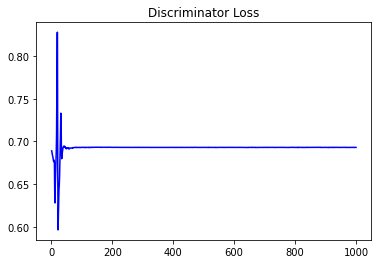

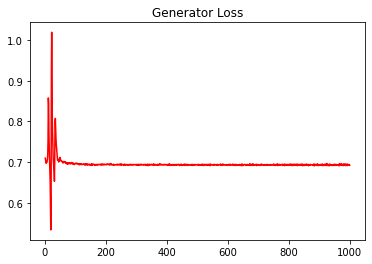

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.005526009447328056


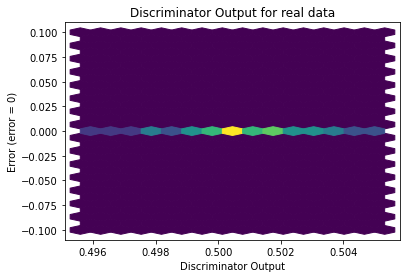

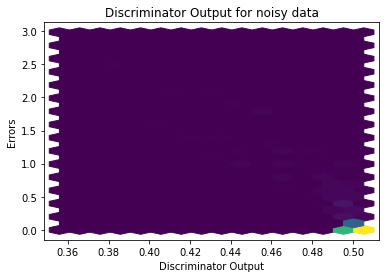

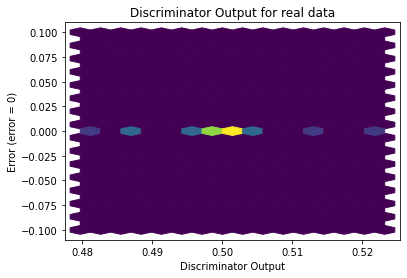

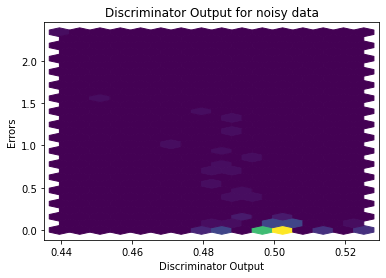

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


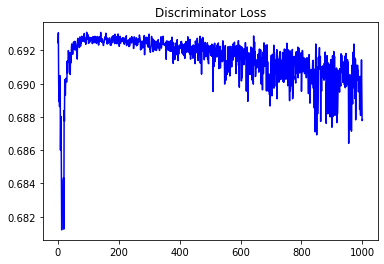

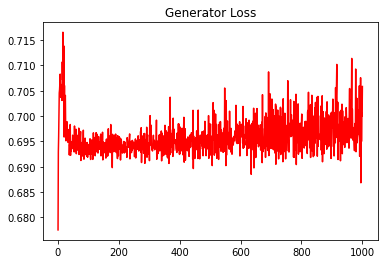

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.00542236734149908


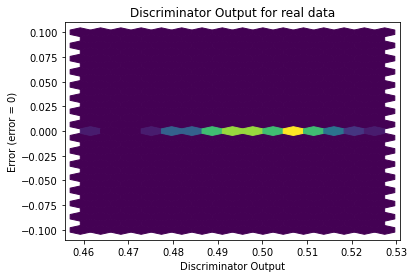

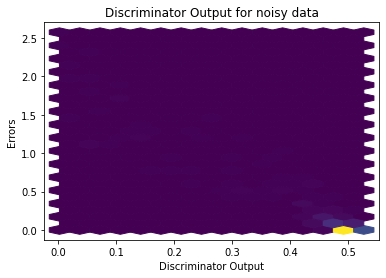

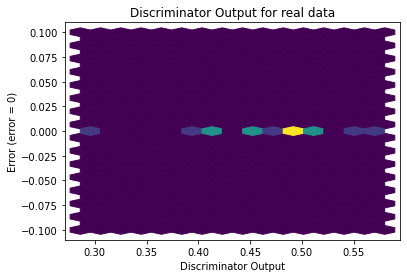

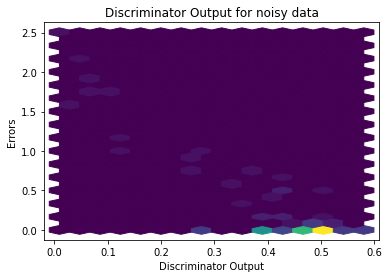

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1872]], requires_grad=True)
